In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [22]:
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
x = df.iloc[:, [0, 1, 2, 3]].values

In [24]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [25]:
# Checking the rows and columns
df.shape

(150, 5)

In [26]:
# Checking the null values with their sum 
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [27]:
# Checking columns names
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [28]:
#checking one column for better understanding of z-score method
mean = np.mean(df['sepal_width'])
std = np.std(df['sepal_width'])

# Step 1: Calculate the Z-Score
df['width-Z-Score'] = (df['sepal_width'] - mean) / std
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,width-Z-Score
0,5.1,3.5,1.4,0.2,Iris-setosa,1.032057
1,4.9,3.0,1.4,0.2,Iris-setosa,-0.124958
2,4.7,3.2,1.3,0.2,Iris-setosa,0.337848
3,4.6,3.1,1.5,0.2,Iris-setosa,0.106445
4,5.0,3.6,1.4,0.2,Iris-setosa,1.263460


In [29]:
iris_setosa=df.loc[df["species"]=="Iris-setosa"]
iris_virginica=df.loc[df["species"]=="Iris-virginica"]
iris_versicolor=df.loc[df["species"]=="Iris-versicolor"]

C:\Users\20128\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\20128\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\20128\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\20128\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot`

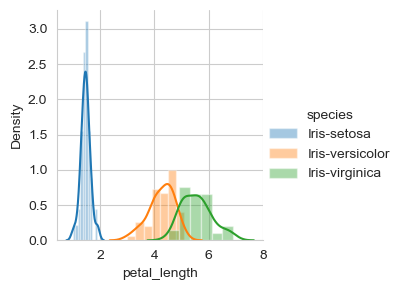

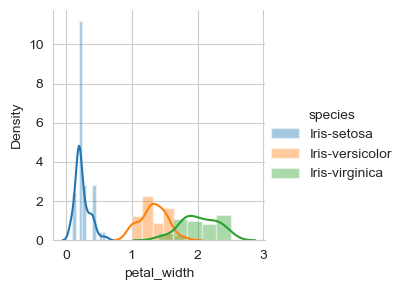

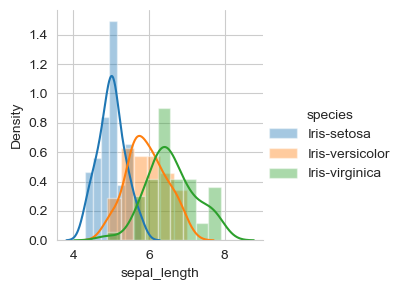

In [30]:
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"sepal_length").add_legend()
plt.show()

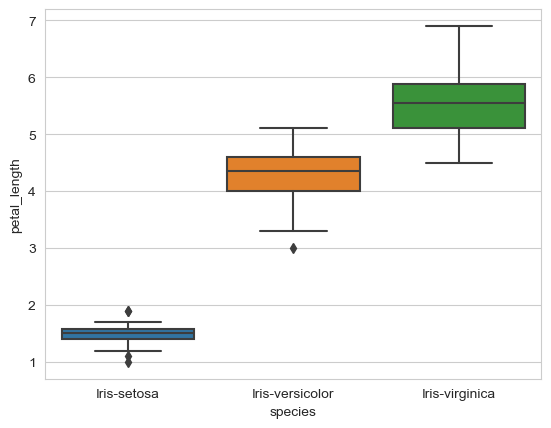

In [31]:
sns.boxplot(x="species",y="petal_length",data=df)
plt.show()

C:\Users\20128\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


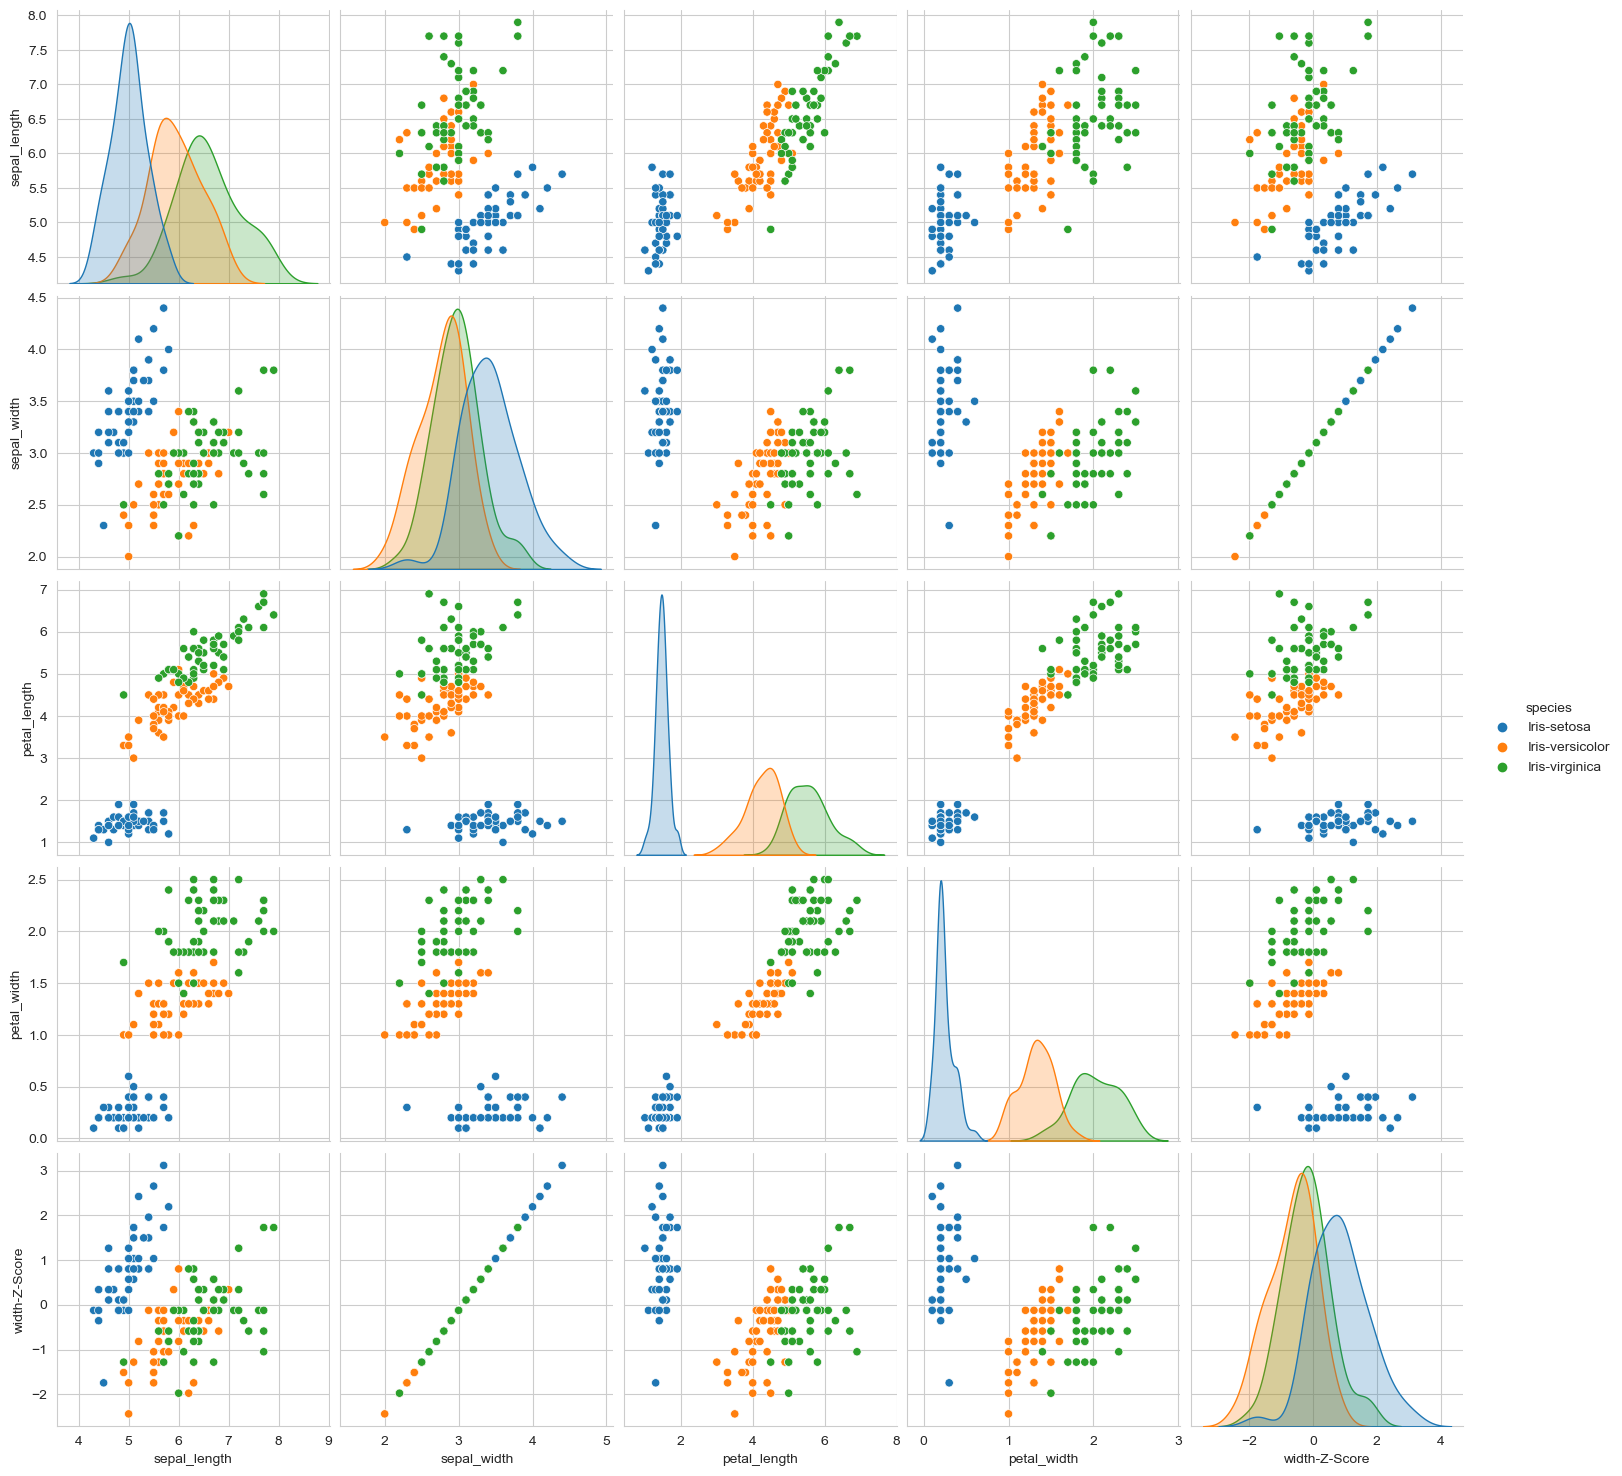

In [32]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="species",size=3);
plt.show()

In [33]:
# Load a data and defining X  Features and y Labels)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

In [34]:
# Testing Different Models and selecting one on the basis of Accuracy Score 
models = {
    'LogisticRegression': (LogisticRegression(), {'C': [0.1, 1, 10]}),
    'KNeighborsClassifier': (KNeighborsClassifier(), {'n_neighbors': range(1, 21)}),
    'DecisionTreeClassifier': (DecisionTreeClassifier(random_state=42), {'max_depth': [None, 5, 10]}),
    'RandomForestClassifier': (RandomForestClassifier(random_state=42), {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10, 15]}),
}


In [35]:
model_results = {}

In [36]:
# Apply feature scaling within the cross-validation loop
for name, (model, params) in models.items():
    # Create a pipeline with a StandardScaler and the model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1))
    ])
    
    # Use cross_val_score for cross-validation 
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    mean_cv_accuracy = cv_scores.mean()
    
    pipeline.fit(X, y)
    best_model = pipeline.named_steps['model'].best_estimator_
    
    model_results[name] = {'Cross-Validation Accuracy': mean_cv_accuracy}
    
    print(f"\nModel: {name}")
    print(f"Cross-Validation Mean Accuracy: {mean_cv_accuracy:.2f}")
    print(f"Best Parameters: {best_model.get_params()}")



Model: LogisticRegression
Cross-Validation Mean Accuracy: 0.97
Best Parameters: {'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


C:\Users\20128\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\20128\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim


Model: KNeighborsClassifier
Cross-Validation Mean Accuracy: 0.95
Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 6, 'p': 2, 'weights': 'uniform'}

Model: DecisionTreeClassifier
Cross-Validation Mean Accuracy: 0.95
Best Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}

Model: RandomForestClassifier
Cross-Validation Mean Accuracy: 0.96
Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_s